The dataset used is the OASIS MRI dataset which can be found on OASIS website or Kaggle. It's divided into 4 classes based on Alzheimers Progression. Very Mild Dementia, Mild Dementia,Moderate Dementia, and Non Demented.
I assigned 400 images for each class"imbalanced data". 
I also used 4 keras based models for image classification: A custom made CNN model, a simple CNN Model, A Pre trained MobileNetV2 Model and a Pre trained Resnet 50 Model. I also did a couple of comparisons between all four machine learning models.

DATASET REFERENCE: Marcus, D.S., Wang, T.H., Parker, J., Csernansky, J.G., Morris, J.C. and Buckner, R.L. (2007). Open Access Series of Imaging Studies (OASIS): Cross-sectional MRI Data in Young, Middle Aged, Nondemented, and Demented Older Adults. Journal of Cognitive Neuroscience, 19(9), pp.1498–1507. doi:https://doi.org/10.1162/jocn.2007.19.9.1498.

In [1]:
# Importing necessary libraries for image processing, model building, and visualization
import numpy as np 
import os
import keras
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
from PIL import Image
from keras.layers import Conv2D, Flatten, Dense, Dropout, BatchNormalization, MaxPooling2D
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import random


In [ ]:
# I'm using this function to collect all images file paths from a given directory
def collect_image_paths(directory):
    paths = []  # I'm creating an empty list to store all the image paths
    for dirname, _, filenames in os.walk(directory):  # I’m looping through the directory to get all files
        for filename in filenames:  # Going through each file in the directory
            paths.append(os.path.join(dirname, filename))  # Adding the full path of each file to the list
    return paths  

# Here I'm collecting the image paths for each category
# When Testing: Please update the file paths below to match the location where you save the dataset I provided in the zip folder
path1 = collect_image_paths(r'C:\Users\mana\OneDrive - University of Sunderland - LIVE\AI\DataSet\Non Demented')  # Non Demented images
path2 = collect_image_paths(r'C:\Users\mana\OneDrive - University of Sunderland - LIVE\AI\DataSet\Mild Dementia')  # Mild Dementia images
path3 = collect_image_paths(r'C:\Users\mana\OneDrive - University of Sunderland - LIVE\AI\DataSet\Moderate Dementia')  # Moderate Dementia images
path4 = collect_image_paths(r'C:\Users\mana\OneDrive - University of Sunderland - LIVE\AI\DataSet\Very Mild Dementia')  # Very Mild Dementia images


In [6]:
""" I selected 400 MRI scans because one of the four categories contains only 400 MRI scans. To balance the dataset
 I randomly chose 400 MRI scans from each category to address the "imbalanced data" issue."""

size = 400  
# I’m fixing the random seed so I can get the same result every time I run this
random.seed(42)

# I’m randomly sampling 400 paths from each category 
sample_path1 = random.sample(path1, min(size, len(path1)))  
sample_path2 = random.sample(path2, min(size, len(path2)))  
sample_path3 = random.sample(path3, min(size, len(path3)))  
sample_path4 = random.sample(path4, min(size, len(path4)))  

# Then showing the sample count for all 4 categories
print(f'Sampled {len(sample_path1)} paths from Non Demented')  
print(f'Sampled {len(sample_path2)} paths from Mild Dementia')  
print(f'Sampled {len(sample_path3)} paths from Moderate Dementia')  
print(f'Sampled {len(sample_path4)} paths from Very Mild Dementia')  


Sampled 400 paths from Non Demented
Sampled 400 paths from Mild Dementia
Sampled 400 paths from Moderate Dementia
Sampled 400 paths from Very Mild Dementia


In [7]:
# I’m initializing the OneHotEncoder to convert labels into a categorical format
encoder = OneHotEncoder()
encoder.fit([[0], [1], [2], [3]])  # I’m fitting the encoder with labels for the categories:
# 0 = Non Demented
# 1 = Mild Dementia
# 2 = Moderate Dementia
# 3 = Very Mild Dementia


OneHotEncoder()

In [8]:
# I started by loading the images and converting them into numpy arrays for model training
data = []  # This will hold the images
result = []  # This will hold the corresponding labels

# Looping over each sampled path to load the images
for path in sample_path1:
    img = Image.open(path)  # I’m opening the image from the path
    img = img.resize((128,128))  # I’m resizing the image to 128x128 to standardize its size
    img = np.array(img)  # I’m converting the image to a numpy array
    if img.shape == (128,128,3):  # I’m ensuring the image has 3 color  (RGB)
        data.append(np.array(img))  # I’m adding the image to the data list
        result.append(encoder.transform([[0]]).toarray())  # I’m encoding the label for 'Non Demented'

for path in sample_path2:
    img = Image.open(path) 
    img = img.resize((128,128))  
    img = np.array(img)  
    if img.shape == (128,128,3): 
        data.append(np.array(img))  
        result.append(encoder.transform([[1]]).toarray())  # I’m encoding the label for 'Mild Dementia'

for path in sample_path3:
    img = Image.open(path)  
    img = img.resize((128,128)) 
    img = np.array(img)  
    if img.shape == (128,128,3):  
        data.append(np.array(img))  
        result.append(encoder.transform([[2]]).toarray())  # I’m encoding the label for 'Moderate Dementia'

for path in sample_path4:
    img = Image.open(path)  
    img = img.resize((128,128)) 
    img = np.array(img) 
    if img.shape == (128,128,3): 
        data.append(np.array(img))  
        result.append(encoder.transform([[3]]).toarray())  # I’m encoding the label for 'Very Mild Dementia'


In [9]:
# I’m converting the lists into numpy arrays for easier manipulation
data = np.array(data)  # Converting the image data list to a numpy array
result = np.array(result)  # Converting the result list to a numpy array
result = result.reshape((1600, 4))  # I’m reshaping the result array to match the output format (1600 samples x 4 categories) flattening


In [10]:
# Convert one hot encoded labels to single-class labels
labels = np.argmax(result, axis=1)

# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(
    data, result, test_size=0.15, shuffle=True, random_state=42)

# Print class distribution for train and test sets
print("Train set:", dict(zip(*np.unique(np.argmax(y_train, axis=1), return_counts=True))))
print("Test set:", dict(zip(*np.unique(np.argmax(y_test, axis=1), return_counts=True))))


Train set: {np.int64(0): np.int64(328), np.int64(1): np.int64(338), np.int64(2): np.int64(343), np.int64(3): np.int64(351)}
Test set: {np.int64(0): np.int64(72), np.int64(1): np.int64(62), np.int64(2): np.int64(57), np.int64(3): np.int64(49)}


I designed the model below which is a custom CNN model designed for multi class image classification. 

In [ ]:
# I chose to build this model using the Keras Sequential API because it is straightforward and user friendly, making it easy to understand and implement.
model = Sequential()

# First Convolutional Layer: I went with a small number of filters (32) and a small kernel (2x2) for the starting layer
model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding='Same'))
model.add(Conv2D(32, kernel_size=(2, 2), activation='relu', padding='Same'))  # ReLU activation to add non linearity
model.add(BatchNormalization())  # I added batch normalization to speed up training and make it more stable.
model.add(MaxPooling2D(pool_size=(2, 2)))  # MaxPooling helps reduce the size of the feature maps after convolution.
model.add(Dropout(0.25))  # Dropout layer with 25% to help prevent overfitting

# Second block: I decided to increase the number of filters to 64 here to help the model pick up more complex patterns
model.add(Conv2D(64, kernel_size=(2, 2), activation='relu', padding='Same'))
model.add(Conv2D(64, kernel_size=(2, 2), activation='relu', padding='Same'))  # Another convolutional layer with 64 filters
model.add(BatchNormalization())  # Batch normalization again to keep things smooth.
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))  # MaxPooling to reduce the size of the feature maps
model.add(Dropout(0.25))  # Dropout again to help reduce overfitting.

# Now I flatten the 2D feature maps into a 1D vector to feed into the fully connected layers
model.add(Flatten())

# For the fully connected layers, I added a Dense layer with 512 neurons and used ReLU activation to learn complex relationships
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))  # I bumped up the dropout rate to 50% to help with regularization and reduce overfitting

# Output layer has 4 neurons because we have 4 classes
# Softmax activation is perfect for multi class classification because it gives us probabilities for each class
model.add(Dense(4, activation='softmax'))

# Compiling the model: I used categorical cross-entropy since it's a multi class problem, and Adamax optimizer for training.
# I'm also tracking accuracy as the performance metric.
model.compile(loss='categorical_crossentropy', optimizer='Adamax', metrics=['accuracy'])

# Finally, I printed the model summary to check out the layers and see how many parameters we're dealing with.
print(model.summary())


C:\Users\mana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 32)   │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 64)     │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    33,554,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,586,628 (128.12 MB)

 Trainable params: 33,586,436 (128.12 MB)

 Non-trainable params: 192 (768.00 B)

None


In [12]:
# I’m training the model with 10 epochs and a batch size of 10 for a balance between efficiency and performance.
history = model.fit(x_train, y_train, epochs=10, batch_size=10, verbose=1, validation_data=(x_test, y_test))

# I added validation data to monitor overfitting or underfitting during the training.


Epoch 1/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 33s 225ms/step - accuracy: 0.6690 - loss: 12.4939 - val_accuracy: 0.9875 - val_loss: 0.0182
Epoch 2/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 31s 225ms/step - accuracy: 0.9832 - loss: 0.1114 - val_accuracy: 1.0000 - val_loss: 6.3054e-05
Epoch 3/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 30s 220ms/step - accuracy: 0.9929 - loss: 0.0382 - val_accuracy: 1.0000 - val_loss: 6.9240e-06
Epoch 4/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 30s 223ms/step - accuracy: 0.9977 - loss: 0.0221 - val_accuracy: 1.0000 - val_loss: 1.9222e-07
Epoch 5/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 31s 225ms/step - accuracy: 0.9930 - loss: 0.0436 - val_accuracy: 1.0000 - val_loss: 7.4009e-08
Epoch 6/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 31s 224ms/step - accuracy: 0.9996 - loss: 0.0014 - val_accuracy: 1.0000 - val_loss: 7.3956e-07
Epoch 7/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 30s 219ms/step - accuracy: 1.0000 - loss: 3.2756e-05 - val_accuracy: 1.0000 - val_loss: 2.1209e-07
Epoch 8/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 30s 219ms/step

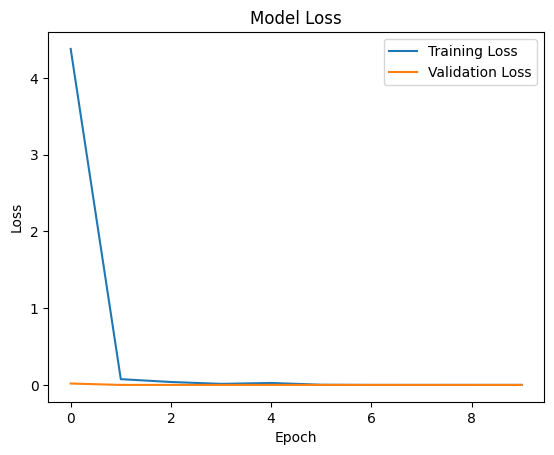

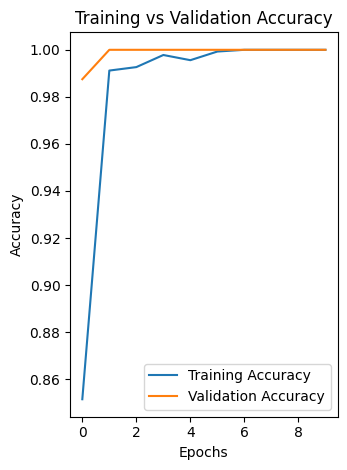

In [13]:
# I’m plotting the training and validation loss to see how the model is learning.
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

# This helps me check if the model is overfitting or underfitting based on the loss curves.


# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()



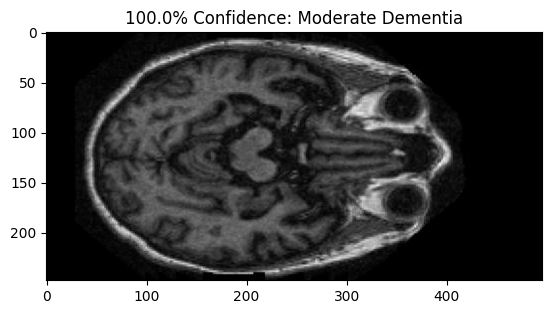

In [14]:
# I created this function to return the class names based on the model's prediction.
# It helps make the output more understandable by converting numeric predictions into readable labels.
def names(number):
    if number == 0:
        return 'Non Demented'
    elif number == 1:
        return 'Mild Dementia'
    elif number == 2:
        return 'Moderate Dementia'
    elif number == 3:
        return 'Very Mild Dementia'
    else:
        return 'Error in Prediction'


# Loading a sample image for prediction
img = Image.open(r'C:\Users\mana\OneDrive - University of Sunderland - LIVE\AI\DataSet\Moderate Dementia\OAS1_0308_MR1_mpr-2_131.jpg')
x = np.array(img.resize((128, 128)))  
x = x.reshape(1, 128, 128, 3)  

# Making the prediction
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]  # Extracting the predicted class

# Showing the image along with the predicted class and confidence level
plt.imshow(img)
plt.title(f'{str(res[0][classification] * 100)}% Confidence: {names(classification)}')
plt.show()


I also created a simpler CNN model with fewer layers and parameters:

In [58]:
# simpler CNN model
model_simple = Sequential()

# First block: Adding a Conv2D layer with 16 filters, 3x3 kernels, and ReLU activation
model_simple.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 3), padding='Same'))
model_simple.add(MaxPooling2D(pool_size=(2, 2)))  # Pooling layer to downsample the image
model_simple.add(Dropout(0.3))  # Adding dropout to prevent overfitting

# Second block: Adding another Conv2D layer with 32 filters and ReLU activation
model_simple.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='Same'))
model_simple.add(MaxPooling2D(pool_size=(2, 2)))  # Another pooling layer
model_simple.add(Dropout(0.3))  # Dropout to keep things from overfitting

# Flattening the output and adding a fully connected layer
model_simple.add(Flatten())  # Flatten the output of the conv layers
model_simple.add(Dense(128, activation='relu'))  # Fully connected layer with 128 neurons
model_simple.add(Dropout(0.5))  # Dropout to prevent overfitting in the fully connected layer

# Output layer: Softmax activation to output probabilities for 4 classes
model_simple.add(Dense(4, activation='softmax'))

# Compiling the model with categorical crossentropy loss and Adam optimizer
model_simple.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

# Printing out the model summary to see the architecture
print(model_simple.summary())


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 128, 128, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 64, 64, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 64, 64, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 64, 64, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 128)            │     4,194,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,200,036 (16.02 MB)

 Trainable params: 4,200,036 (16.02 MB)

 Non-trainable params: 0 (0.00 B)

None


Epoch 1/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.5106 - loss: 1.1701 - val_accuracy: 0.8375 - val_loss: 0.5250
Epoch 2/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.8352 - loss: 0.4498 - val_accuracy: 0.9792 - val_loss: 0.0767
Epoch 3/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.9645 - loss: 0.1063 - val_accuracy: 0.9917 - val_loss: 0.0493
Epoch 4/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.9730 - loss: 0.0779 - val_accuracy: 1.0000 - val_loss: 0.0181
Epoch 5/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.9828 - loss: 0.0542 - val_accuracy: 1.0000 - val_loss: 0.0085
Epoch 6/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.9770 - loss: 0.0568 - val_accuracy: 1.0000 - val_loss: 0.0061
Epoch 7/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.9917 - loss: 0.0170 - val_accuracy: 1.0000 - val_loss: 0.0023
Epoch 8/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.9961 - loss: 0.0165 - val_accu

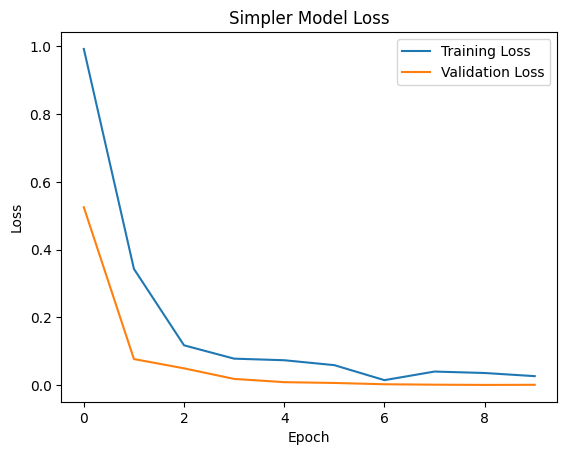

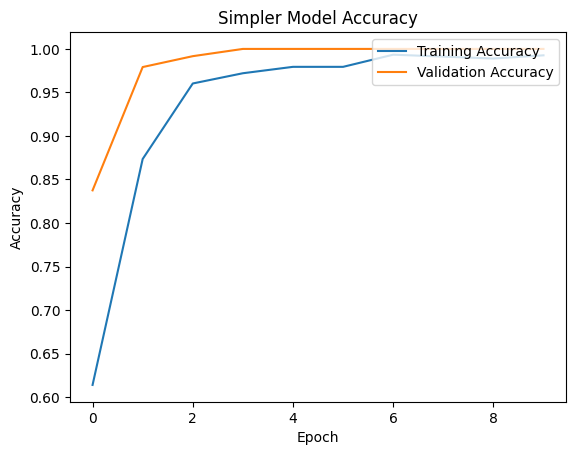

In [61]:
# Training the simpler CNN model
history_simple = model_simple.fit(x_train, y_train, epochs=10, batch_size=10, verbose=1, validation_data=(x_test, y_test))

# Plotting training and validation loss
plt.plot(history_simple.history['loss'], label='Training Loss')
plt.plot(history_simple.history['val_loss'], label='Validation Loss')
plt.title('Simpler Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

# Plotting training and validation accuracy
plt.plot(history_simple.history['accuracy'], label='Training Accuracy')
plt.plot(history_simple.history['val_accuracy'], label='Validation Accuracy')
plt.title('Simpler Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')
plt.show()


Predicting the simple model:

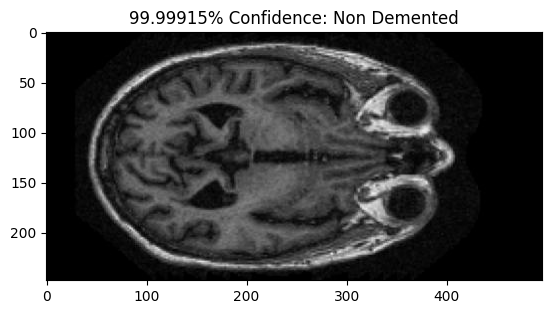

In [65]:
model_to_use = model_simple  

# Loading a sample MRI image
img = Image.open(r'C:\Users\mana\OneDrive - University of Sunderland - LIVE\AI\DataSet\Non Demented\OAS1_0001_MR1_mpr-1_124.jpg')
x = np.array(img.resize((128, 128)))  # Resizing the image
x = x.reshape(1, 128, 128, 3)  # Reshaping to match model input

# Predicting the class
res = model_to_use.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]  # Get the predicted class index

# Displaying the image and thee predicted class
plt.imshow(img)
plt.title(f'{str(res[0][classification] * 100)}% Confidence: {names(classification)}')
plt.show()


I also made this  MobileNetV2 model, which is a pretrained deep CNN model:

In [66]:
from keras.applications import MobileNetV2
from keras.layers import GlobalAveragePooling2D

# Pretrained MobileNetV2 Model 
model_transfer = Sequential()

# Loading the pretrained MobileNetV2 model without the top classification layers
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Here i'm freezing the layers of the base model so that they don’t get updated during training
base_model.trainable = False

# Adding the base model to the new model
model_transfer.add(base_model)

#  global average pooling to reduce dimensions
model_transfer.add(GlobalAveragePooling2D())

# Fully connected layer with 128 units
model_transfer.add(Dense(128, activation='relu'))
model_transfer.add(Dropout(0.5))

# Output layer for multi-class classification
model_transfer.add(Dense(4, activation='softmax'))

# Compiling the model
model_transfer.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

# Printing the model summary
print(model_transfer.summary())


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_128            │ (None, 4, 4, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,468 (9.24 MB)

 Trainable params: 164,484 (642.52 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

None


Training the MobileNetV2 Transfer Learning Model:

Epoch 1/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.4339 - loss: 1.2962 - val_accuracy: 0.7708 - val_loss: 0.6291
Epoch 2/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.7540 - loss: 0.6296 - val_accuracy: 0.9167 - val_loss: 0.3460
Epoch 3/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.8538 - loss: 0.4184 - val_accuracy: 0.9625 - val_loss: 0.2400
Epoch 4/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.8817 - loss: 0.3430 - val_accuracy: 0.9417 - val_loss: 0.2357
Epoch 5/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.9111 - loss: 0.2636 - val_accuracy: 0.9625 - val_loss: 0.1500
Epoch 6/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.9252 - loss: 0.2143 - val_accuracy: 0.9500 - val_loss: 0.1537
Epoch 7/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.9242 - loss: 0.2122 - val_accuracy: 0.9833 - val_loss: 0.1319
Epoch 8/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.9433 - loss: 0.1828 - val_accu

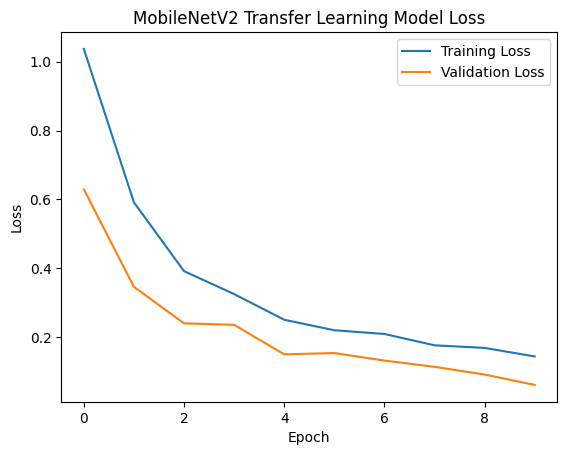

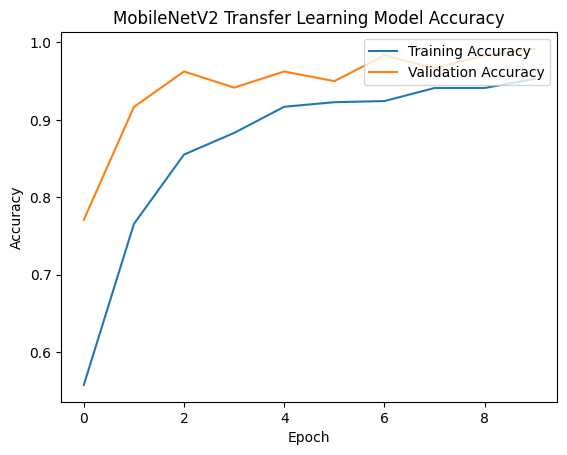

In [18]:
# Train the MobileNetV2 model
history_transfer = model_transfer.fit(x_train, y_train, epochs=10, batch_size=10, verbose=1, validation_data=(x_test, y_test))

# Plotting training and validation loss
plt.plot(history_transfer.history['loss'], label='Training Loss')
plt.plot(history_transfer.history['val_loss'], label='Validation Loss')
plt.title('MobileNetV2 Transfer Learning Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

# Plotting training and validation accuracy
plt.plot(history_transfer.history['accuracy'], label='Training Accuracy')
plt.plot(history_transfer.history['val_accuracy'], label='Validation Accuracy')
plt.title('MobileNetV2 Transfer Learning Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')
plt.show()


Predicting MobileNetV2 model: 

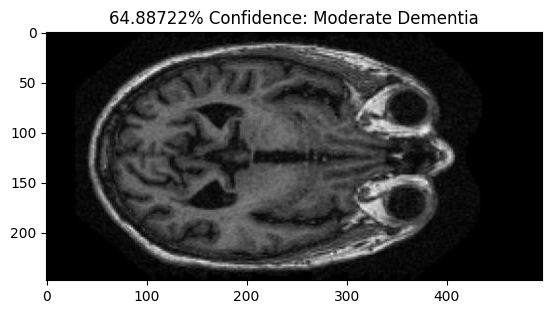

In [69]:
#  using the MobileNetV2 model
model_to_use = model_transfer  

# Loading a random MRI image
img = Image.open(r'C:\Users\mana\OneDrive - University of Sunderland - LIVE\AI\DataSet\Non Demented\OAS1_0001_MR1_mpr-1_124.jpg')  

# Resizing the image to 128x128 so it fits the model's input size
x = np.array(img.resize((128, 128)))  
x = x.reshape(1, 128, 128, 3)  # Reshaping it to match the model input (batch size, height, width, channels)

# Let’s make the prediction with MobileNetV2
res = model_to_use.predict_on_batch(x)  
classification = np.where(res == np.amax(res))[1][0]  # Finding the class with the highest score

# Showing the image and the prediction with confidence
plt.imshow(img)
plt.title(f'{str(res[0][classification] * 100)}% Confidence: {names(classification)}') 
plt.show()


ResNet50 Model:

Epoch 1/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 20s 115ms/step - accuracy: 0.6273 - loss: 1.3442 - val_accuracy: 0.9542 - val_loss: 0.1850
Epoch 2/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 14s 102ms/step - accuracy: 0.9226 - loss: 0.2242 - val_accuracy: 0.9292 - val_loss: 0.1757
Epoch 3/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 14s 102ms/step - accuracy: 0.9631 - loss: 0.1218 - val_accuracy: 0.9792 - val_loss: 0.0651
Epoch 4/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 14s 103ms/step - accuracy: 0.9660 - loss: 0.1038 - val_accuracy: 0.9917 - val_loss: 0.0244
Epoch 5/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 14s 102ms/step - accuracy: 0.9913 - loss: 0.0397 - val_accuracy: 0.9958 - val_loss: 0.0169
Epoch 6/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 14s 103ms/step - accuracy: 0.9887 - loss: 0.0390 - val_accuracy: 0.9875 - val_loss: 0.0507
Epoch 7/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 14s 102ms/step - accuracy: 0.9857 - loss: 0.0471 - val_accuracy: 1.0000 - val_loss: 0.0084
Epoch 8/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 14s 102ms/step - accuracy: 0.9699 - loss: 0

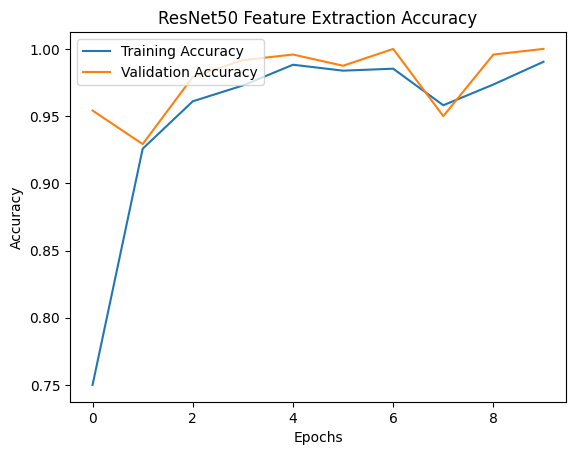

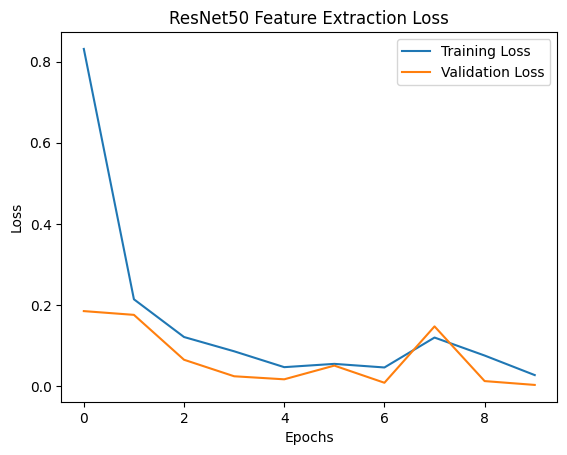

In [70]:
# First, I'm going to load the ResNet50 base model without the top layer, so I can customize it
from keras.applications import ResNet50
from keras.models import Model
from keras.layers import Dense, Dropout, GlobalAveragePooling2D
from keras.optimizers import Adam

# Let's load the ResNet50 model with pre-trained ImageNet weights, but exclude the top layer for now
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# I'm freezing the layers of ResNet50 so they don’t get trained 
for layer in base_model.layers:
    layer.trainable = False

# Now, I’ll add my own classification head on top of the ResNet50 base model
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Apply global average pooling to reduce the dimensions
x = Dense(512, activation='relu')(x)  # Add a fully connected layer with 512 units
x = Dropout(0.5)(x)  # Add dropout for regularization (helps prevent overfitting)
predictions = Dense(4, activation='softmax')(x)  # Output layer with 4 classes (for multi-class classification)

# I’m combining the base model and my new layers to create the final model
model_resnet = Model(inputs=base_model.input, outputs=predictions)

# Now, I’ll compile the model using the Adam optimizer and categorical crossentropy loss for multi class classification
model_resnet.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

#  training the model and monitor its performance
history_resnet = model_resnet.fit(x_train, y_train, epochs=10, batch_size=10, validation_data=(x_test, y_test))

# Then visualize the training and validation accuracy to see how well the model is doing
plt.plot(history_resnet.history['accuracy'], label='Training Accuracy')
plt.plot(history_resnet.history['val_accuracy'], label='Validation Accuracy')
plt.title('ResNet50 Feature Extraction Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

# Finally I’ll plot the training and validation loss to check if the model is overfitting or improving
plt.plot(history_resnet.history['loss'], label='Training Loss')
plt.plot(history_resnet.history['val_loss'], label='Validation Loss')
plt.title('ResNet50 Feature Extraction Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()


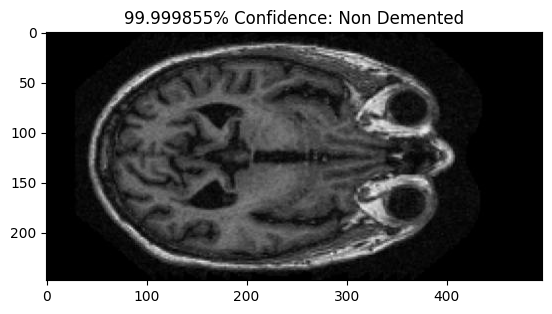

In [71]:
# Using the ResNet50 model for making predictions
model_to_use = model_resnet  

# Now, I’ll load a sample MRI image to make a prediction on
img = Image.open(r'C:\Users\mana\OneDrive - University of Sunderland - LIVE\AI\DataSet\Non Demented\OAS1_0001_MR1_mpr-1_124.jpg')  

# I'll resize the image to match the model's input size (128x128) and convert it to a numpy array
x = np.array(img.resize((128, 128)))  
x = x.reshape(1, 128, 128, 3)  

# Now I’m going to make a prediction using the ResNet50 model
res = model_to_use.predict_on_batch(x)  # Get the prediction from the model

# Finding the class with the highest confidence score 
classification = np.where(res == np.amax(res))[1][0]

# Finally,, display the image along with the predicted class and confidence percentage
plt.imshow(img)
plt.title(f'{str(res[0][classification] * 100)}% Confidence: {names(classification)}')  
plt.show()


Comparison of Models Performance

In [38]:
# Now, I’m going to evaluate each model on the test data to see how they perform
results_custom_cnn = model.evaluate(x_test, y_test, verbose=0)
results_simple_cnn = model_simple.evaluate(x_test, y_test, verbose=0)
results_mobilenetv2 = model_transfer.evaluate(x_test, y_test, verbose=0)
results_resnet50 = model_resnet.evaluate(x_test, y_test, verbose=0)

# I'll extract the loss and accuracy values from the evaluation results
results = {
    'Model': ['Custom CNN', 'Simpler CNN', 'MobileNetV2', 'ResNet50'],
    'Loss': [results_custom_cnn[0], results_simple_cnn[0], results_mobilenetv2[0], results_resnet50[0]],
    'Accuracy': [results_custom_cnn[1], results_simple_cnn[1], results_mobilenetv2[1], results_resnet50[1]]
}

# I'll put these results into a DataFrame so I can compare them more easily
comparison_df = pd.DataFrame(results)

# Here's the final table showing how each model performed on the test data
comparison_df


,Model,Loss,Accuracy
0,Custom CNN,2.682202e-08,1.000000
1,Simpler CNN,4.624625e-03,1.000000
2,MobileNetV2,1.981624e+00,0.300000
3,ResNet50,3.172828e-02,0.991667


Side-by-Side Prediction Comparison:

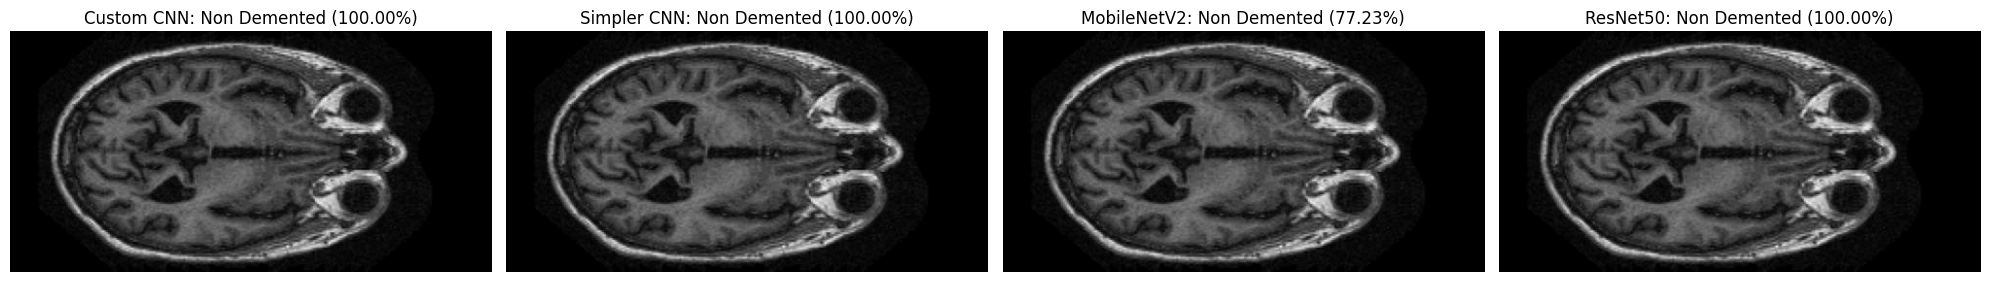

In [39]:
# Assigning a random image from the dataset
img_path = r'C:\Users\mana\OneDrive - University of Sunderland - LIVE\AI\DataSet\Non Demented\OAS1_0001_MR1_mpr-1_124.jpg'
img = Image.open(img_path)

# Preprocessing the image for each model
x = np.array(img.resize((128, 128)))  # Resizing the image
x = x.reshape(1, 128, 128, 3)  # Reshaping to match model input

# Predicting with each model
pred_custom_cnn = model.predict_on_batch(x)
pred_simple_cnn = model_simple.predict_on_batch(x)
pred_mobilenetv2 = model_transfer.predict_on_batch(x)
pred_resnet50 = model_resnet.predict_on_batch(x)

# Getting the predicted class and confidence
class_custom_cnn = np.where(pred_custom_cnn == np.amax(pred_custom_cnn))[1][0]
class_simple_cnn = np.where(pred_simple_cnn == np.amax(pred_simple_cnn))[1][0]
class_mobilenetv2 = np.where(pred_mobilenetv2 == np.amax(pred_mobilenetv2))[1][0]
class_resnet50 = np.where(pred_resnet50 == np.amax(pred_resnet50))[1][0]

# Displaying the image with predictions from each model
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

# Custom CNN prediction
axs[0].imshow(img)
axs[0].set_title(f"Custom CNN: {names(class_custom_cnn)} ({pred_custom_cnn[0][class_custom_cnn]*100:.2f}%)")
axs[0].axis('off')

# Simpler CNN prediction
axs[1].imshow(img)
axs[1].set_title(f"Simpler CNN: {names(class_simple_cnn)} ({pred_simple_cnn[0][class_simple_cnn]*100:.2f}%)")
axs[1].axis('off')

# MobileNetV2 prediction
axs[2].imshow(img)
axs[2].set_title(f"MobileNetV2: {names(class_mobilenetv2)} ({pred_mobilenetv2[0][class_mobilenetv2]*100:.2f}%)")
axs[2].axis('off')

# ResNet50 prediction
axs[3].imshow(img)
axs[3].set_title(f"ResNet50: {names(class_resnet50)} ({pred_resnet50[0][class_resnet50]*100:.2f}%)")
axs[3].axis('off')

plt.tight_layout()
plt.show()


Confusion Matrix Comparison:

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 228ms/step


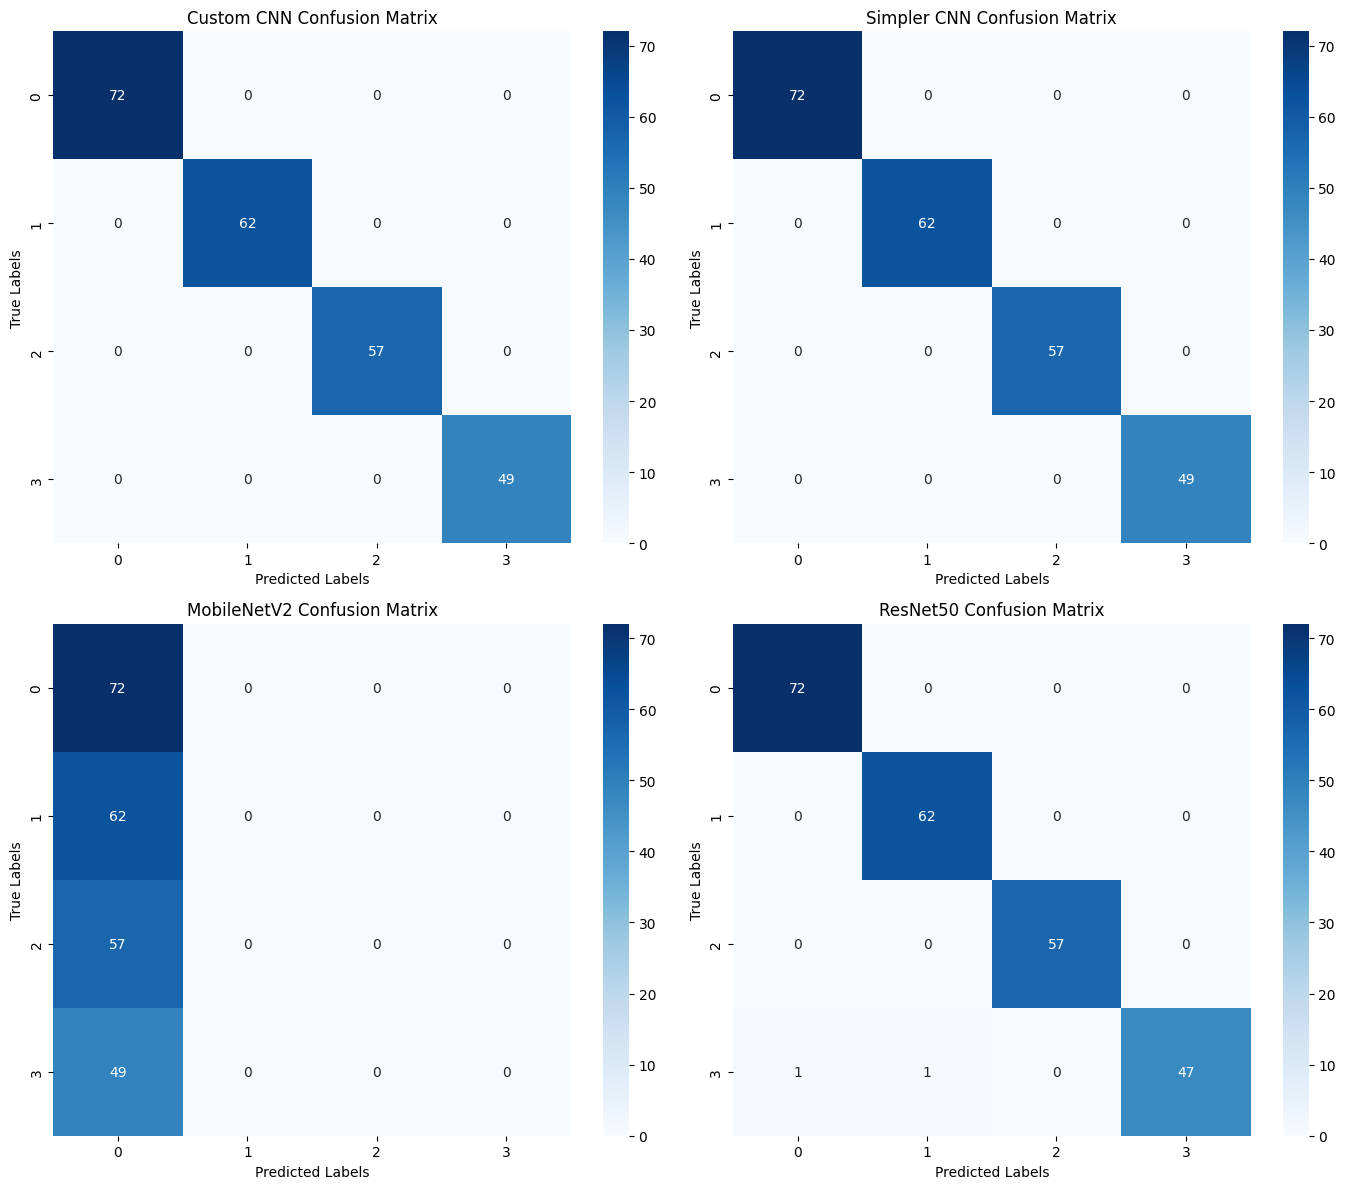

In [41]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# First, I'll get the predictions from each model on the test set
y_pred_custom_cnn = np.argmax(model.predict(x_test), axis=1)
y_pred_simple_cnn = np.argmax(model_simple.predict(x_test), axis=1)
y_pred_mobilenetv2 = np.argmax(model_transfer.predict(x_test), axis=1)
y_pred_resnet50 = np.argmax(model_resnet.predict(x_test), axis=1)

# I'll also need the true labels to compare against the predictions
y_true = np.argmax(y_test, axis=1)

# Now, I’ll calculate the confusion matrices for each model
cm_custom_cnn = confusion_matrix(y_true, y_pred_custom_cnn)
cm_simple_cnn = confusion_matrix(y_true, y_pred_simple_cnn)
cm_mobilenetv2 = confusion_matrix(y_true, y_pred_mobilenetv2)
cm_resnet50 = confusion_matrix(y_true, y_pred_resnet50)

# Then plot all the confusion matrices in a 2x2 grid to compare them
fig, axs = plt.subplots(2, 2, figsize=(14, 12))

# Custom CNN confusion matrix
sns.heatmap(cm_custom_cnn, annot=True, fmt="d", cmap="Blues", ax=axs[0, 0])
axs[0, 0].set_title("Custom CNN Confusion Matrix")
axs[0, 0].set_xlabel("Predicted Labels")  # Label for X-axis
axs[0, 0].set_ylabel("True Labels")      # Label for Y-axis

# Simpler CNN confusion matrix
sns.heatmap(cm_simple_cnn, annot=True, fmt="d", cmap="Blues", ax=axs[0, 1])
axs[0, 1].set_title("Simpler CNN Confusion Matrix")
axs[0, 1].set_xlabel("Predicted Labels")  # Label for X-axis
axs[0, 1].set_ylabel("True Labels")      # Label for Y-axis

# MobileNetV2 confusion matrix
sns.heatmap(cm_mobilenetv2, annot=True, fmt="d", cmap="Blues", ax=axs[1, 0])
axs[1, 0].set_title("MobileNetV2 Confusion Matrix")
axs[1, 0].set_xlabel("Predicted Labels")  # Label for X-axis
axs[1, 0].set_ylabel("True Labels")      # Label for Y-axis

# ResNet50 confusion matrix
sns.heatmap(cm_resnet50, annot=True, fmt="d", cmap="Blues", ax=axs[1, 1])
axs[1, 1].set_title("ResNet50 Confusion Matrix")
axs[1, 1].set_xlabel("Predicted Labels")  # Label for X-axis
axs[1, 1].set_ylabel("True Labels")      # Label for Y-axis

# Adjusting the layout to make sure everything fits and display the plots
plt.tight_layout()
plt.show()


Precesion, Recall, and F1 Score

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

# Now, I’ll calculate the precision, recall, and F1 score for each model, using a weighted average
precision_custom_cnn, recall_custom_cnn, f1_custom_cnn, _ = precision_recall_fscore_support(y_true, y_pred_custom_cnn, average='weighted')
precision_simple_cnn, recall_simple_cnn, f1_simple_cnn, _ = precision_recall_fscore_support(y_true, y_pred_simple_cnn, average='weighted')
precision_mobilenetv2, recall_mobilenetv2, f1_mobilenetv2, _ = precision_recall_fscore_support(y_true, y_pred_mobilenetv2, average='weighted')
precision_resnet50, recall_resnet50, f1_resnet50, _ = precision_recall_fscore_support(y_true, y_pred_resnet50, average='weighted')

# Here I created a DataFrame to compare the Precision, Recall, and F1 Scores across the models
comparison_metrics = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1 Score'],
    'Custom CNN': [precision_custom_cnn, recall_custom_cnn, f1_custom_cnn],
    'Simpler CNN': [precision_simple_cnn, recall_simple_cnn, f1_simple_cnn],
    'MobileNetV2': [precision_mobilenetv2, recall_mobilenetv2, f1_mobilenetv2],
    'ResNet50': [precision_resnet50, recall_resnet50, f1_resnet50]
})

# Here’s the table to compare these metrics across the different models
comparison_metrics

C:\Users\mana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Metric,Custom CNN,Simpler CNN,MobileNetV2,ResNet50
0,Precision,1.0,1.0,0.090000,0.991790
1,Recall,1.0,1.0,0.300000,0.991667
2,F1 Score,1.0,1.0,0.138462,0.991611


Here's the Model Training Time Comparison


In [43]:
import time

# I'm going to record the training time for each model, starting with the custom CNN
start_time = time.time()
model.fit(x_train, y_train, epochs=10, batch_size=32)
custom_cnn_training_time = time.time() - start_time

# Now, I'll do the same for the simpler CNN model
start_time = time.time()
model_simple.fit(x_train, y_train, epochs=10, batch_size=32)
simple_cnn_training_time = time.time() - start_time

# Next, I'll test MobileNetV2 and track how long it takes to train
start_time = time.time()
model_transfer.fit(x_train, y_train, epochs=10, batch_size=32)
mobilenetv2_training_time = time.time() - start_time

# Finally, I'll train ResNet50 and measure the time it takes too
start_time = time.time()
model_resnet.fit(x_train, y_train, epochs=10, batch_size=32)
resnet50_training_time = time.time() - start_time

# Putting all the training times together in a comparison table
training_time_comparison = pd.DataFrame({
    'Model': ['Custom CNN', 'Simpler CNN', 'MobileNetV2', 'ResNet50'],
    'Training Time (seconds)': [custom_cnn_training_time, simple_cnn_training_time, mobilenetv2_training_time, resnet50_training_time]
})

training_time_comparison


Epoch 1/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 19s 431ms/step - accuracy: 0.9996 - loss: 4.1531e-04
Epoch 2/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 18s 426ms/step - accuracy: 0.9992 - loss: 0.0111
Epoch 3/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 19s 432ms/step - accuracy: 1.0000 - loss: 4.0406e-05
Epoch 4/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 20s 456ms/step - accuracy: 1.0000 - loss: 1.1058e-04
Epoch 5/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 19s 440ms/step - accuracy: 0.9982 - loss: 0.0022
Epoch 6/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 19s 448ms/step - accuracy: 1.0000 - loss: 1.4047e-05
Epoch 7/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 18s 427ms/step - accuracy: 0.9990 - loss: 0.0028
Epoch 8/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 19s 442ms/step - accuracy: 1.0000 - loss: 4.6423e-04
Epoch 9/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 18s 427ms/step - accuracy: 1.0000 - loss: 7.4498e-05
Epoch 10/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 18s 421ms/step - accuracy: 1.0000 - loss: 1.2260e-05
Epoch 1/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.9933 - loss: 0.0167
Epoch 2/10
43/43

,Model,Training Time (seconds)
0,Custom CNN,188.162935
1,Simpler CNN,22.230513
2,MobileNetV2,33.835871
3,ResNet50,110.018279


Here, I tested the reaction of the simple machine learning model I created by blurring a random MRI image. This process involved applying a Gaussian blur to the image and observing how the model classifies it. The same approach can be applied to any of the four machine learning models used in this prototype to evaluate their robustness to image distortions.



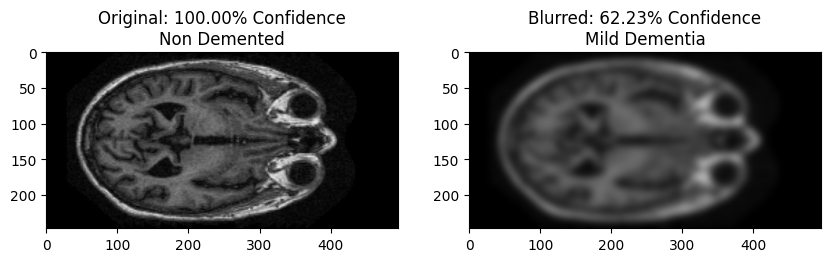

In [47]:
from PIL import Image, ImageFilter
import numpy as np
import matplotlib.pyplot as plt

# Here im Specifying the model to use for predictions
model_to_use = model_simple

# Then, Preprocessing the image to prepare it for model input
def preprocess_image(image, size=(128, 128)):

#Resizing the image and converting it into a format suitable for the model.
   
    image = image.resize(size)
    x = np.array(image).reshape(1, *size, 3)  
    return x

img_path = r'C:\Users\mana\OneDrive - University of Sunderland - LIVE\AI\DataSet\Non Demented\OAS1_0001_MR1_mpr-1_124.jpg'
original_img = Image.open(img_path)
original_input = preprocess_image(original_img)

# Creating a blurred version of the original image 
blurred_img = original_img.filter(ImageFilter.GaussianBlur(radius=5))
blurred_input = preprocess_image(blurred_img)

# Predicting using the model for both original and blurred images
res_original = model_to_use.predict_on_batch(original_input)
res_blurred = model_to_use.predict_on_batch(blurred_input)

classification_original = np.argmax(res_original)
confidence_original = res_original[0][classification_original] * 100

# Extract the predicted class and confidence score for the blurred image
classification_blurred = np.argmax(res_blurred)
confidence_blurred = res_blurred[0][classification_blurred] * 100

# Displaying the original and blurred images along with their predictions
plt.figure(figsize=(10, 5))

# Plotting original image with prediction
plt.subplot(1, 2, 1)
plt.imshow(original_img)
plt.title(f'Original: {confidence_original:.2f}% Confidence\n{names(classification_original)}')

# Plotting blurred image with prediction
plt.subplot(1, 2, 2)
plt.imshow(blurred_img)
plt.title(f'Blurred: {confidence_blurred:.2f}% Confidence\n{names(classification_blurred)}')

plt.show()
